In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.1/800.1 kB 7.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [3]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("dotdetection").project("pointkneedetectionv5")
version = project.version(12)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.54, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to PointKneeDetectionV5-12 in yolov8:: 100%|██████████| 148/148 [00:01<00:00, 144.97it/s]


Para un modelo más pequeño y rápido (pero potencialmente menos preciso):
model = YOLO('https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n-pose.pt')

Para un modelo de tamaño medio:
model = YOLO('https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8s-pose.pt')

Para un modelo más grande y potencialmente más preciso (pero más lento):
model = YOLO('https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8m-pose.pt')

Para el modelo más grande y potencialmente más preciso:
model = YOLO('https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8l-pose.pt')

Para el modelo más grande y preciso (pero también el más lento):
model = YOLO('https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8x-pose.pt')

In [10]:
from ultralytics import YOLO

# Definir la ruta al archivo data.yaml
data_yaml = 'PointKneeDetectionV5-12/data.yaml'


# Tranfer learning con pesos de pose position
# Inicializar el modelo YOLOv8 pre-entrenado para detección de keypoints
model = YOLO('https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8x-pose.pt')

# Entrenar el modelo (fine-tuning)
results = model.train(
    data=data_yaml,
    epochs=100,
    imgsz=640,
    batch=16,
    name='yolov8n_pose_custom_transfer',
    pretrained=True,
    freeze=10,
    lr0=0.001,
    patience=50,
    save=True,
    device='0'  # Usar GPU 0 (cambia a 'cpu' si no tienes GPU)
)

# Evaluar el modelo en el conjunto de validación
val_results = model.val()

100%|██████████| 133M/133M [00:00<00:00, 159MB/s]


Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolov8x-pose.pt, data=PointKneeDetectionV5-12/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8n_pose_custom_transfer, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

train: Scanning /content/drive/MyDrive/BonesYolov8/PointKneeDetectionV5-12/train/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/drive/MyDrive/BonesYolov8/PointKneeDetectionV5-12/valid/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]


Plotting labels to runs/pose/yolov8n_pose_custom_transfer/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 103 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/pose/yolov8n_pose_custom_transfer
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.95G      2.774      0.832     0.7952      4.096      3.204         60        640: 100%|██████████| 4/4 [00:06<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]

                   all          5         15    0.00262      0.267    0.00199    0.00056    0.00933      0.933      0.116      0.045



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.36G      2.587     0.7041     0.7497          4      3.107         54        640: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all          5         15     0.0947      0.267       0.13     0.0415     0.0953      0.667      0.241      0.222



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.64G      1.993     0.4331     0.5359      3.735      2.541         72        640: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all          5         15     0.0319      0.333     0.0526     0.0151     0.0845      0.333     0.0891       0.07



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.65G      1.818     0.3044     0.4235      2.759      2.162         69        640: 100%|██████████| 4/4 [00:04<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all          5         15      0.195      0.933      0.312      0.127      0.195      0.933       0.32      0.263



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.61G       1.67     0.1981     0.3118      2.479      2.104         50        640: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


                   all          5         15     0.0161      0.933     0.0165    0.00721     0.0168          1      0.019     0.0184

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      6/100       5.8G      1.673     0.1948     0.2905      2.079      1.976         72        640: 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all          5         15     0.0284      0.933     0.0402     0.0169     0.0284      0.933     0.0402     0.0397



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.79G      1.741     0.1459     0.2418       2.14      2.045         70        640: 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


                   all          5         15      0.255        0.6       0.31      0.151      0.256      0.667      0.312      0.285

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.79G       1.64     0.1185      0.243      2.028      1.971         74        640: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all          5         15     0.0407      0.933     0.0828     0.0344     0.0346      0.933     0.0825      0.066



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.81G      1.614      0.142     0.1975      1.899      1.869         67        640: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all          5         15     0.0079        0.8     0.0118    0.00616    0.00828      0.733     0.0239     0.0211



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     10/100       5.8G      1.534     0.1601     0.2164      1.739      1.821         54        640: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]

                   all          5         15      0.227        0.8      0.254      0.133      0.226      0.733      0.251      0.241



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.79G      1.497     0.1312     0.1748      1.626      1.819         51        640: 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all          5         15      0.145          1      0.355      0.141      0.145          1      0.355       0.32

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.81G      1.552     0.1299      0.235      1.672      1.845         95        640: 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all          5         15      0.321          1      0.561      0.287      0.321          1      0.561      0.503



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.82G      1.423     0.1342     0.2058      1.527      1.744         79        640: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


                   all          5         15       0.69        0.6      0.659      0.275       0.69        0.6      0.659      0.633

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.81G      1.434     0.1058     0.2071      1.571      1.788         58        640: 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all          5         15      0.377          1      0.602      0.295      0.377          1      0.602       0.58



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.77G      1.563     0.1226     0.1925      1.623       1.89         53        640: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all          5         15      0.376      0.989       0.59      0.303      0.376      0.989       0.59      0.551



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.65G      1.438      0.118     0.1851      1.566       1.78         54        640: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]

                   all          5         15      0.282      0.921      0.518      0.232      0.462      0.845      0.658      0.609



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.81G      1.375     0.1021     0.1713      1.429      1.704         59        640: 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all          5         15      0.323      0.867      0.435      0.211      0.323      0.867      0.499      0.493



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.79G      1.413     0.1179     0.2078      1.489        1.7         49        640: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

                   all          5         15      0.044      0.267     0.0571     0.0223      0.044      0.267     0.0625      0.051



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.65G      1.375     0.1044     0.1832      1.455      1.706         56        640: 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all          5         15     0.0358        0.8     0.0458     0.0228     0.0417      0.933     0.0575     0.0522



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.81G      1.338     0.1092     0.1648      1.358      1.671         75        640: 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all          5         15     0.0385      0.133     0.0339     0.0138     0.0585      0.333     0.0659     0.0601



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.82G       1.26      0.118     0.2238      1.319      1.614         53        640: 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all          5         15     0.0365      0.133     0.0594     0.0224     0.0405      0.733     0.0719     0.0628



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.04G      1.334     0.1159     0.1527      1.381      1.698         55        640: 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all          5         15      0.451      0.533      0.435      0.243      0.448        0.6       0.48      0.431

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.66G      1.318    0.09039     0.2067      1.376      1.752         40        640: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all          5         15      0.598      0.667       0.68      0.324      0.451      0.994      0.711      0.695



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.65G       1.27     0.1008     0.1791      1.279       1.66         76        640: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all          5         15       0.52      0.833      0.725      0.355       0.52      0.833      0.728      0.703



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.65G      1.109    0.09551     0.1584      1.186        1.5         71        640: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


                   all          5         15      0.283      0.733      0.424      0.195      0.317      0.919      0.555       0.44

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.65G      1.284    0.09883      0.149      1.258      1.615         76        640: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all          5         15      0.386      0.719      0.474      0.249      0.386      0.719      0.474      0.474



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.65G      1.222     0.1052     0.1554       1.21      1.562         94        640: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all          5         15       0.37        0.6      0.425      0.181       0.37        0.6      0.425      0.414



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.66G      1.179     0.1024     0.1547      1.162      1.557         71        640: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all          5         15      0.459      0.733      0.648       0.31      0.459      0.733      0.648      0.648

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.65G      1.119    0.08625      0.159       1.17      1.503         57        640: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all          5         15      0.569      0.733      0.692      0.351      0.569      0.733      0.692      0.692



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.66G      1.187    0.08542     0.1522      1.118      1.501         64        640: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all          5         15      0.489      0.933      0.699      0.346      0.489      0.933      0.699      0.697



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.65G      1.204    0.08582     0.1586      1.187       1.58         45        640: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]

                   all          5         15        0.7      0.798       0.74      0.394        0.7      0.798       0.74       0.74



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.64G      1.029    0.07405     0.1349      1.102      1.459         78        640: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


                   all          5         15      0.462      0.867      0.719      0.405      0.462      0.867      0.719      0.719

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.64G      1.096     0.0778     0.1414      1.056      1.485         62        640: 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all          5         15      0.366      0.867      0.611        0.3      0.366      0.867      0.611      0.611



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.66G      1.092    0.08511     0.1298      1.039      1.467         71        640: 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all          5         15      0.847      0.652      0.682      0.297      0.847      0.652      0.682      0.681



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.64G      1.046    0.07796     0.1117      1.057      1.443         53        640: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all          5         15      0.546        0.8      0.786      0.376      0.546        0.8      0.786      0.786

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.66G     0.9871    0.06811     0.1374     0.9925      1.396         75        640: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]

                   all          5         15      0.457      0.933      0.751      0.403      0.457      0.933      0.751      0.751



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.65G      1.016    0.07666     0.1399      1.015       1.41         61        640: 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all          5         15      0.667        0.6      0.692      0.343      0.667        0.6      0.692       0.69



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.66G     0.9621    0.07642     0.1387     0.9907      1.419         70        640: 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all          5         15      0.493      0.932       0.75      0.352      0.493      0.932       0.75       0.75



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.66G     0.9376    0.06875     0.1436      0.974      1.346         56        640: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]

                   all          5         15      0.488      0.726      0.633       0.32      0.526      0.787      0.665      0.662



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.65G     0.9047    0.08162     0.1478     0.9448      1.345         63        640: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


                   all          5         15      0.445      0.783      0.674      0.341      0.451        0.8      0.719        0.7

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.66G     0.9203    0.07012     0.1112     0.9696      1.374         54        640: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all          5         15      0.562      0.792      0.772      0.371      0.562      0.792      0.777      0.773



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.63G     0.9414     0.0932     0.1521     0.9103      1.342         55        640: 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all          5         15      0.432      0.763      0.764      0.372      0.432      0.763      0.764      0.764



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.66G     0.8594    0.08056     0.1197     0.9344       1.27         90        640: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all          5         15      0.464      0.727      0.744      0.418       0.52      0.794       0.77       0.77



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.62G     0.8683    0.07934     0.1431     0.8935      1.307         63        640: 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all          5         15      0.438        0.8      0.707      0.387      0.469      0.867      0.734      0.734



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.67G     0.8967    0.07732     0.1095     0.9221      1.292         54        640: 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all          5         15      0.533      0.788      0.685      0.358      0.561      0.853      0.726      0.725



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.66G     0.7615    0.06553     0.1067     0.8213      1.201         73        640: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


                   all          5         15      0.499      0.789      0.651      0.336      0.537      0.774      0.684      0.684

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.66G      0.846    0.06901     0.1012     0.8531      1.279         80        640: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all          5         15      0.486      0.791      0.633      0.358      0.536      0.856      0.698      0.698



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.66G     0.7722    0.05715    0.08302      0.769      1.225         60        640: 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all          5         15      0.459      0.793      0.613      0.328      0.508      0.858      0.681      0.681



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.67G     0.8326     0.0589     0.1055     0.8959       1.29         70        640: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all          5         15      0.433      0.933      0.668      0.333      0.451        0.8      0.677      0.677



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.66G     0.7906    0.07289    0.09142     0.8106      1.231         55        640: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]

                   all          5         15      0.526       0.85      0.704      0.324      0.526       0.85      0.704      0.703



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.65G     0.7811    0.06361    0.09585      0.793      1.237         60        640: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all          5         15      0.651      0.762      0.768      0.378      0.651      0.762      0.768      0.767



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.66G     0.7462    0.05832    0.09389     0.7658      1.241         48        640: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


                   all          5         15      0.719      0.647      0.844      0.424      0.719      0.647      0.844      0.843

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.67G     0.7661    0.05281     0.0982     0.7295      1.229         73        640: 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all          5         15      0.758      0.739      0.861      0.394      0.758      0.739      0.861      0.859



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.67G     0.7664    0.06564    0.08378     0.7485      1.234         63        640: 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all          5         15      0.641        0.8       0.79      0.353      0.641        0.8       0.79       0.79



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.66G     0.7328    0.05924     0.1148     0.6836      1.202         65        640: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all          5         15      0.504      0.867      0.728      0.328      0.504      0.867      0.728      0.728

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.05G     0.7988    0.06235    0.09449     0.7153      1.217         74        640: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all          5         15      0.766      0.681      0.746      0.336      0.766      0.681      0.746      0.746



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.66G     0.6577    0.05518       0.12     0.6314      1.139         69        640: 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]

                   all          5         15      0.699      0.652      0.711       0.34      0.699      0.652      0.711      0.711



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.66G     0.7295    0.05869      0.105     0.6823      1.219         75        640: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all          5         15       0.71      0.733      0.702      0.347       0.71      0.733      0.702      0.702



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.66G     0.7185    0.05504     0.1167     0.6755      1.172         64        640: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all          5         15      0.614      0.789      0.764      0.388      0.614      0.789      0.764      0.764



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.66G     0.6605    0.05336    0.08643     0.6263      1.126         65        640: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all          5         15      0.669      0.795       0.78      0.386      0.716      0.739       0.83      0.829

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.66G     0.7137    0.04249    0.09366     0.6602      1.192         55        640: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all          5         15      0.778      0.722      0.852      0.428      0.778      0.722      0.852      0.851

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.66G     0.6589    0.04781     0.0918     0.6631      1.155         62        640: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all          5         15      0.743        0.8      0.862      0.421      0.743        0.8      0.862      0.862



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.66G     0.7399     0.0473    0.09615     0.7204      1.204         65        640: 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all          5         15      0.842      0.796      0.805      0.468      0.842      0.796      0.805      0.805



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.66G     0.7074    0.06018    0.09009     0.6582      1.179         55        640: 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


                   all          5         15      0.771      0.733      0.789      0.476      0.771      0.733      0.789      0.789

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.66G     0.7602    0.05796     0.1101     0.7302      1.275         43        640: 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all          5         15      0.647      0.856       0.77      0.413      0.647      0.856       0.77       0.77



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.67G     0.6936    0.05916     0.1154     0.6518      1.162         65        640: 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all          5         15      0.644      0.859      0.771      0.371      0.644      0.859      0.771      0.771



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.03G     0.6192    0.05651     0.1116     0.6157      1.112         74        640: 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all          5         15      0.837        0.8      0.776      0.402      0.837        0.8      0.776      0.776



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.66G     0.6329    0.06401     0.1004     0.6128      1.145         68        640: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


                   all          5         15      0.847        0.8      0.776      0.422      0.847        0.8      0.776      0.776

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.62G     0.5945    0.05625    0.08675     0.6071       1.09         64        640: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all          5         15      0.722      0.814      0.824      0.399      0.722      0.814      0.824      0.824



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.66G     0.6494    0.05372     0.1086     0.5893      1.146         56        640: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all          5         15       0.58      0.909       0.79      0.395      0.631      0.974      0.852      0.852



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.62G     0.6041    0.06197    0.09342     0.5887      1.116         60        640: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all          5         15      0.625      0.798      0.754      0.396      0.625      0.798      0.806      0.806

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.66G     0.6473     0.0521     0.1097     0.6101      1.178         52        640: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all          5         15      0.707      0.733      0.817      0.421      0.707      0.733      0.817      0.817



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.62G     0.5984    0.05937    0.09517     0.5954      1.101         62        640: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all          5         15      0.633      0.947      0.817      0.434      0.633      0.947      0.817      0.817



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.66G      0.602    0.05161    0.09744     0.5681      1.072         55        640: 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all          5         15      0.612      0.933      0.788      0.421      0.612      0.933      0.788      0.788

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.66G     0.6709    0.05087    0.08353     0.6136      1.164         58        640: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all          5         15      0.627      0.921      0.786      0.381      0.627      0.921      0.786      0.786



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.68G     0.5469    0.05306    0.08656     0.5212      1.057         54        640: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all          5         15      0.574      0.915      0.773      0.362      0.574      0.915      0.773      0.773



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.66G     0.6124    0.04731     0.1107      0.599      1.106         70        640: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


                   all          5         15      0.564      0.908      0.751      0.382      0.564      0.908      0.751      0.751

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.66G     0.6455    0.05232    0.08563     0.6209      1.158         50        640: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all          5         15      0.645      0.791      0.745      0.405      0.645      0.791      0.745      0.745



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.65G       0.58    0.04933    0.07474     0.5551       1.07         73        640: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all          5         15      0.646      0.733      0.742      0.403      0.646      0.733      0.742      0.742



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.66G     0.5119    0.05318    0.07959     0.4916      1.031         80        640: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all          5         15      0.553      0.862      0.747      0.401      0.553      0.862      0.747      0.747



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.66G     0.6101    0.03933    0.09718     0.5638      1.112         61        640: 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all          5         15      0.597      0.947      0.751      0.395      0.597      0.947      0.751      0.751



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.66G     0.5575    0.05729    0.08385     0.5516      1.073         56        640: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all          5         15      0.624      0.739      0.751      0.396      0.624      0.739      0.751      0.751



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.66G     0.5828    0.03984    0.08824     0.5584      1.098         66        640: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


                   all          5         15      0.683      0.733      0.753       0.39      0.683      0.733      0.753      0.753

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.66G     0.4962     0.0395    0.08346     0.4712      1.024         55        640: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all          5         15      0.505      0.862      0.753      0.393      0.505      0.862      0.753      0.753



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.65G     0.5209    0.04628     0.1105     0.4825      1.076         65        640: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all          5         15       0.56      0.915      0.729      0.373       0.56      0.915      0.729      0.729



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.66G     0.4944    0.03837    0.09705     0.4824      1.046         64        640: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all          5         15      0.525       0.86      0.711      0.398      0.525       0.86      0.711      0.711



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.62G     0.5337     0.0551    0.08005     0.4965      1.082         52        640: 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


                   all          5         15      0.629       0.73      0.753      0.405      0.629       0.73      0.753      0.753

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.67G     0.5168    0.03949    0.08596     0.5416      1.044         71        640: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all          5         15      0.682      0.733      0.753      0.424      0.682      0.733      0.753      0.753



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.65G     0.5669    0.04847      0.115     0.5466      1.087         83        640: 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all          5         15      0.638      0.733      0.741      0.414      0.638      0.733      0.741      0.741



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.66G     0.5386    0.04678    0.09519      0.525      1.075         69        640: 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all          5         15      0.607      0.792      0.782      0.443      0.607      0.792      0.782      0.782


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.66G     0.4457    0.03697    0.05652     0.4081      1.032         36        640: 100%|██████████| 4/4 [00:07<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

                   all          5         15      0.604      0.789      0.782      0.452      0.604      0.789      0.782      0.782



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.65G     0.4033    0.03783     0.0469     0.3935      1.012         36        640: 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]

                   all          5         15      0.585      0.877      0.771      0.425      0.585      0.877      0.771      0.771



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.66G     0.4103    0.03705    0.03575     0.3987     0.9904         36        640: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


                   all          5         15      0.615      0.901      0.748      0.411      0.615      0.901      0.748      0.748

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.66G     0.4089    0.03735    0.03614     0.4066      1.011         36        640: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all          5         15       0.62      0.907      0.748      0.403       0.62      0.907      0.748      0.748



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.62G     0.3521    0.03655    0.02724     0.3627     0.9771         36        640: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all          5         15      0.618      0.912      0.748        0.4      0.618      0.912      0.748      0.748



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.66G     0.3452     0.0389    0.03778     0.3601     0.9779         36        640: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all          5         15      0.644      0.823      0.759      0.396      0.644      0.823      0.759      0.759



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.62G     0.3588    0.03818    0.04047     0.3486     0.9664         36        640: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all          5         15      0.676      0.798      0.759      0.404      0.676      0.798      0.759      0.759



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.66G      0.349    0.04018    0.02157     0.3502     0.9764         36        640: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


                   all          5         15      0.672        0.8      0.759      0.404      0.672        0.8      0.759      0.759

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.66G     0.3426    0.04006    0.02531     0.3312     0.9801         36        640: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


                   all          5         15      0.668        0.8      0.759      0.405      0.668        0.8      0.759      0.759

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.66G     0.3684    0.04144    0.03385     0.3571     0.9364         36        640: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all          5         15       0.67        0.8      0.782      0.417       0.67        0.8      0.782      0.782



100 epochs completed in 0.201 hours.
Optimizer stripped from runs/pose/yolov8n_pose_custom_transfer/weights/last.pt, 139.4MB
Optimizer stripped from runs/pose/yolov8n_pose_custom_transfer/weights/best.pt, 139.4MB

Validating runs/pose/yolov8n_pose_custom_transfer/weights/best.pt...
Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-pose summary (fused): 287 layers, 69453195 parameters, 0 gradients, 263.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


                   all          5         15      0.733        0.8      0.862      0.422      0.733        0.8      0.862      0.862
                  knee          5          5      0.906          1      0.995      0.526      0.906          1      0.995      0.995
              leftKnee          5          5      0.728        0.6       0.75      0.389      0.728        0.6       0.75       0.75
             rightKnee          5          5      0.565        0.8      0.839      0.349      0.565        0.8      0.839      0.839
Speed: 0.3ms preprocess, 39.7ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/pose/yolov8n_pose_custom_transfer
Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-pose summary (fused): 287 layers, 69453195 parameters, 0 gradients, 263.2 GFLOPs


val: Scanning /content/drive/MyDrive/BonesYolov8/PointKneeDetectionV5-12/valid/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


                   all          5         15      0.745        0.8      0.862      0.428      0.745        0.8      0.862      0.862
                  knee          5          5      0.912          1      0.995      0.526      0.912          1      0.995      0.995
              leftKnee          5          5      0.723        0.6       0.75      0.389      0.723        0.6       0.75       0.75
             rightKnee          5          5      0.601        0.8      0.839      0.369      0.601        0.8      0.839      0.839
Speed: 0.4ms preprocess, 87.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/pose/yolov8n_pose_custom_transfer2



image 1/1 /content/drive/MyDrive/BonesYolov8/PointKneeDetectionV5-12/valid/images/Image_977_jpg.rf.269c244406e6e6445150a895bc6ec82f.jpg: 640x640 1 knee, 1 leftKnee, 2 rightKnees, 78.4ms
Speed: 2.2ms preprocess, 78.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


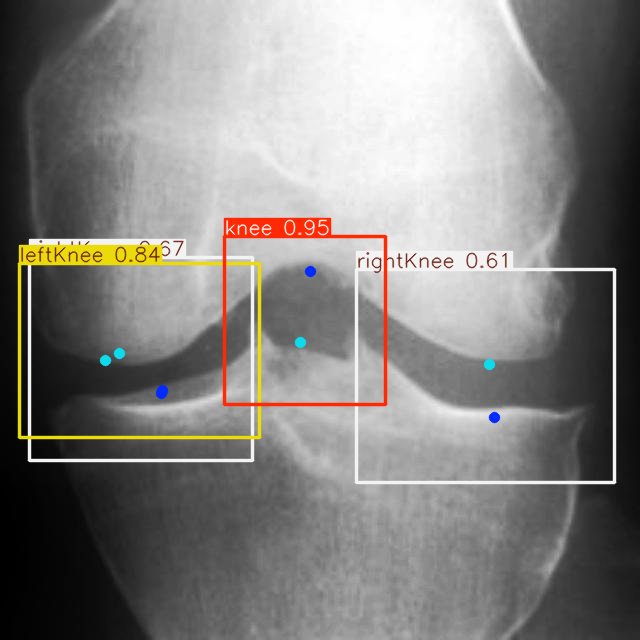

Detecciones para Image_977_jpg.rf.269c244406e6e6445150a895bc6ec82f.jpg:
1 knee, confianza promedio: 0.95
1 leftKnee, confianza promedio: 0.84
2 rightKnee, confianza promedio: 0.64
Número total de keypoints detectados: 4



image 1/1 /content/drive/MyDrive/BonesYolov8/PointKneeDetectionV5-12/valid/images/Image_979_jpg.rf.ac3cf4cdab0f2319b19b541ffd08549b.jpg: 640x640 2 knees, 1 leftKnee, 1 rightKnee, 62.1ms
Speed: 4.8ms preprocess, 62.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


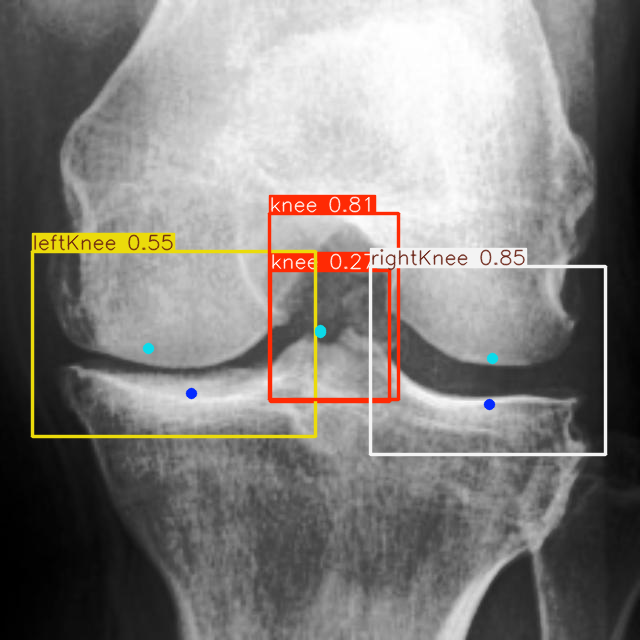

Detecciones para Image_979_jpg.rf.ac3cf4cdab0f2319b19b541ffd08549b.jpg:
2 knee, confianza promedio: 0.54
1 leftKnee, confianza promedio: 0.55
1 rightKnee, confianza promedio: 0.85
Número total de keypoints detectados: 4



image 1/1 /content/drive/MyDrive/BonesYolov8/PointKneeDetectionV5-12/valid/images/Image_980_jpg.rf.6b157703d8bc8ca6e10c410da950bbea.jpg: 640x640 1 knee, 2 leftKnees, 1 rightKnee, 62.0ms
Speed: 4.4ms preprocess, 62.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


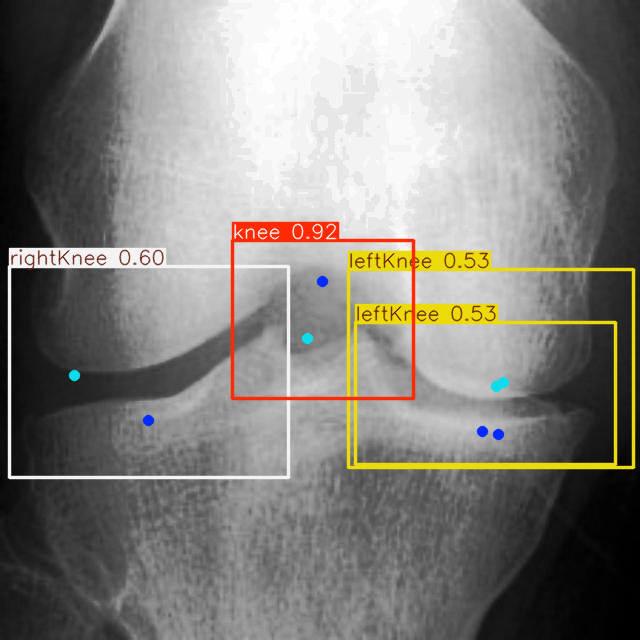

Detecciones para Image_980_jpg.rf.6b157703d8bc8ca6e10c410da950bbea.jpg:
1 knee, confianza promedio: 0.92
2 leftKnee, confianza promedio: 0.53
1 rightKnee, confianza promedio: 0.60
Número total de keypoints detectados: 4



image 1/1 /content/drive/MyDrive/BonesYolov8/PointKneeDetectionV5-12/valid/images/Image_986_jpg.rf.e33c7b2e5f04f1a272620fc50abe1551.jpg: 640x640 1 knee, 1 leftKnee, 1 rightKnee, 62.0ms
Speed: 2.1ms preprocess, 62.0ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)


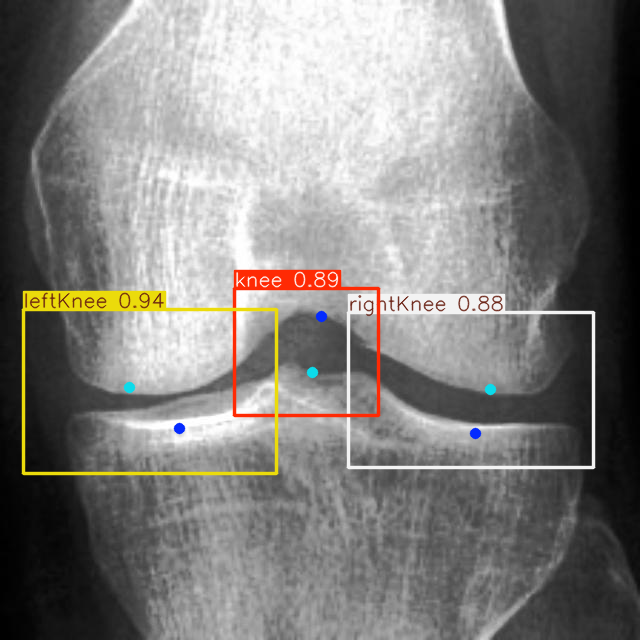

Detecciones para Image_986_jpg.rf.e33c7b2e5f04f1a272620fc50abe1551.jpg:
1 knee, confianza promedio: 0.89
1 leftKnee, confianza promedio: 0.94
1 rightKnee, confianza promedio: 0.88
Número total de keypoints detectados: 3



image 1/1 /content/drive/MyDrive/BonesYolov8/PointKneeDetectionV5-12/valid/images/Image_990_jpg.rf.c4a93fd69ba376da52df50af87922274.jpg: 640x640 1 knee, 2 rightKnees, 62.0ms
Speed: 1.8ms preprocess, 62.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


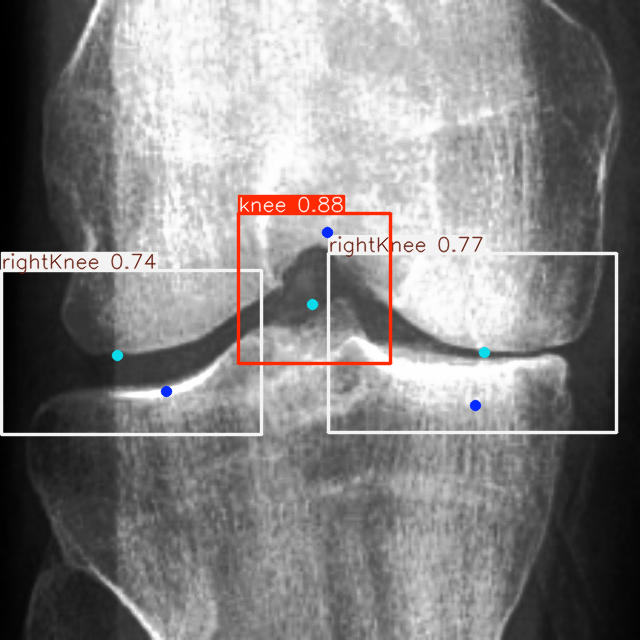

Detecciones para Image_990_jpg.rf.c4a93fd69ba376da52df50af87922274.jpg:
1 knee, confianza promedio: 0.88
2 rightKnee, confianza promedio: 0.75
Número total de keypoints detectados: 3


Resultados guardados en validation_results


In [12]:
from ultralytics import YOLO
import glob
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np

# Cargar el modelo entrenado
model = YOLO('/BonesYolov8/runs/pose/yolov8n_pose_custom_transfer/weights/best.pt')

# Directorio que contiene las imágenes para validar
image_dir = '/BonesYolov8/PointKneeDetectionV5-12/valid/images'

# Obtener todas las imágenes en el directorio
image_files = glob.glob(os.path.join(image_dir, '*.jpg')) + glob.glob(os.path.join(image_dir, '*.png'))

# Crear un directorio para guardar los resultados
results_dir = 'validation_results'
os.makedirs(results_dir, exist_ok=True)

# Procesar cada imagen
for img_path in image_files:
    # Realizar la predicción
    results = model(img_path)

    # Obtener la imagen con las detecciones dibujadas
    img = results[0].plot()

    # Convertir de BGR a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Guardar la imagen con las detecciones
    output_path = os.path.join(results_dir, os.path.basename(img_path))
    cv2.imwrite(output_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))

    # Mostrar la imagen usando cv2_imshow
    cv2_imshow(img_rgb)

    # Mostrar información sobre las detecciones
    print(f"Detecciones para {os.path.basename(img_path)}:")
    for r in results:
        # Contar las detecciones de cada clase
        class_counts = {'knee': 0, 'leftKnee': 0, 'rightKnee': 0}
        class_confidences = {'knee': [], 'leftKnee': [], 'rightKnee': []}

        for box in r.boxes:
            cls = int(box.cls[0])
            conf = float(box.conf[0])
            class_name = model.names[cls]
            if class_name in class_counts:
                class_counts[class_name] += 1
                class_confidences[class_name].append(conf)

        # Imprimir los resultados
        for class_name, count in class_counts.items():
            if count > 0:
                avg_conf = sum(class_confidences[class_name]) / len(class_confidences[class_name])
                print(f"{count} {class_name}, confianza promedio: {avg_conf:.2f}")

        total_keypoints = sum(class_counts.values())
        print(f"Número total de keypoints detectados: {total_keypoints}")

    print("\n")

print(f"Resultados guardados en {results_dir}")